In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import geopandas as gpd
#import pycountry

In [20]:
path = (r'C:\Users\ollie\OneDrive - Danmarks Tekniske Universitet\Uni\Data Visualisation\Homework 9\Inflation.csv')
df_full = pd.read_csv(path, sep=',')
pd.options.display.max_columns = 999
df_full.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070,NaN
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801,NaN
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540,NaN
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470,NaN
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195,NaN


In [21]:
np.set_printoptions(threshold=2000)
#df_full.columns.values
#df_full['SUBJECT'].unique()
#times = df_full['TIME'].unique()

bar_timekeep = ['1956', 
'1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', 
'1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', 
'2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

print(len(bar_timekeep))

66


In [22]:
#There are 3 types of "subject"
# - Energy
# - Food
# - Total excluding energy and food
# - Total

# Only totals
df = df_full.copy()

# Remove all rows that are not in the years 2000-2022 with monthly data
"""
times_keep = ['2000-01', '2000-02'
, '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09'
, '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04'
, '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11'
, '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06'
, '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01'
, '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08'
, '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03'
, '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10'
, '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05'
, '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12'
, '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07'
, '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02'
, '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09'
, '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04'
, '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11'
, '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06'
, '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01'
, '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08'
, '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03'
, '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10'
, '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05'
, '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12'
, '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07'
, '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02'
, '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09'
, '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04'
, '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11'
, '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06'
, '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01'
, '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08'
, '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03'
, '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10'
, '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05'
, '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'
, '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07'
, '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02'
, '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09'
, '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04'
, '2022-05', '2022-06', '2022-07', '2022-08'] """

"\ntimes_keep = ['2000-01', '2000-02'\n, '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09'\n, '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04'\n, '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11'\n, '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06'\n, '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01'\n, '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08'\n, '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03'\n, '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10'\n, '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05'\n, '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12'\n, '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07'\n, '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02'\n, '2007-03', 

In [23]:
times_keep = ['2010-01'
, '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08'
, '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03'
, '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10'
, '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05'
, '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12'
, '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07'
, '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02'
, '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09'
, '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04'
, '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11'
, '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06'
, '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01'
, '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08'
, '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03'
, '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10'
, '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05'
, '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'
, '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07'
, '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02'
, '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09'
, '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04'
, '2022-05', '2022-06', '2022-07', '2022-08']

In [24]:
df = df.loc[df['TIME'].isin(times_keep)]
#df = df.loc[df['TIME'].isin(bar_timekeep)]
df['TIME'].unique()

array(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', 

In [25]:
# Remove all rows that are not total
print("Before:", len(df['SUBJECT']))
df.drop(df.index[df['SUBJECT'] != "TOT"], inplace = True)
print("After:", len(df['SUBJECT']))


Before: 54724
After: 14925


In [26]:
df['LOCATION'].unique()

array(['AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC',
       'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD',
       'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR',
       'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'IDN', 'ISR', 'RUS',
       'SVN', 'ZAF', 'OECD', 'OECDE', 'G-7', 'COL', 'LVA', 'SAU', 'EA19',
       'ARG', 'LTU', 'CRI', 'G-20', 'EU27_2020'], dtype=object)

In [10]:
countries_keep = ['AUS','AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC',
       'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD', 'NZL'
       'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR',
       'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'IDN', 'ISR', 'RUS',
       'SVN', 'ZAF', 'COL', 'LVA', 'SAU',
       'ARG', 'LTU', 'CRI']
df = df.loc[df['LOCATION'].isin(countries_keep)]

df = df.loc[df['MEASURE'] == "AGRWTH"]

df = df.drop(columns=['Flag Codes'])
#df['LOCATION'].unique()
#df.drop(df.columns[50:100], axis=1, inplace=True)
df = df.rename(columns={'Value': 'VALUE'})
#df.columns.values
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,VALUE
122,AUS,CPI,TOT,AGRWTH,A,1956,5.681818
123,AUS,CPI,TOT,AGRWTH,A,1957,2.867383
124,AUS,CPI,TOT,AGRWTH,A,1958,0.696864
125,AUS,CPI,TOT,AGRWTH,A,1959,2.076125
126,AUS,CPI,TOT,AGRWTH,A,1960,3.728814


In [11]:
print('Number of countries: ', len(df['LOCATION'].unique()))
#print('Number of months: ', len(df['TIME'].unique()))
print('Number of years: ', len(df['TIME'].unique()))
print('Length of dataframe: ', len(df))


Number of countries:  44
Number of years:  66
Length of dataframe:  2291


In [12]:

country_dict = {'AUS': 'Australia', 
                'AUT': 'Austria',
                'BEL': 'Belgium',
                'CAN': 'Canada',
                'CZE': 'Czech Republic',
                'DNK': 'Denmark',
                'FIN': 'Finland',
                'FRA': 'France',
                'DEU': 'Germany',
                'GRC': 'Greece',
                'HUN': 'Hungary',
                'ISL': 'Iceland',
                'IRL': 'Ireland',
                'ITA': 'Italy',
                'JPN': 'Japan',
                'KOR': 'Korea',
                'LUX': 'Luxembourg',
                'MEX': 'Mexico',
                'NLD': 'Netherlands',
                'NZL': 'New Zealand',
                'NOR': 'Norway',
                'POL': 'Poland',
                'PRT': 'Portugal',
                'SVK': 'Slovakia',
                'ESP': 'Spain',
                'SWE': 'Sweden',
                'CHE': 'Switzerland',
                'TUR': 'Turkey',
                'GBR': 'United Kingdom',
                'USA': 'United States of America',
                'BRA': 'Brazil',
                'CHL': 'Chile',
                'CHN': 'China',
                'EST': 'Estonia',
                'IND': 'India',
                'IDN': 'Indonesia',
                'ISR': 'Israel',
                'RUS': 'Russia',
                'SVN': 'Slovenia',
                'ZAF': 'South Africa',
                'COL': 'Colombia',
                'LVA': 'Latvia',
                'SAU': 'Saudi Arabia',
                'ARG': 'Argentina',
                'LTU': 'Lithuania',
                'CRI': 'Costa Rica'}
                
df['COUNTRY'] = df['LOCATION'].map(country_dict)

In [13]:
print(df['FREQUENCY'].unique())
print(df['SUBJECT'].unique())
print(df['INDICATOR'].unique())

['A']
['TOT']
['CPI']


In [14]:
df['VALUE'] = df['VALUE'].round(2)

In [15]:
df = df.rename(columns={'VALUE': 'Value', 'COUNTRY': 'Country', 'TIME': 'Year'})

In [16]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Year,Value,Country
122,AUS,CPI,TOT,AGRWTH,A,1956,5.68,Australia
123,AUS,CPI,TOT,AGRWTH,A,1957,2.87,Australia
124,AUS,CPI,TOT,AGRWTH,A,1958,0.70,Australia
125,AUS,CPI,TOT,AGRWTH,A,1959,2.08,Australia
126,AUS,CPI,TOT,AGRWTH,A,1960,3.73,Australia


In [17]:
df.to_csv('data/inflation_clean_bar.csv', index=False)

In [23]:
df.to_csv('data/inflation_clean.csv', index=False)

In [ ]:
df_no_bra = df.loc[df['LOCATION'] != "BRA"]
df_no_bra_rus = df_no_bra.loc[df_no_bra['LOCATION'] != "RUS"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "ISR"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "SVN"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "LTU"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "LVA"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "POL"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "CHL"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "MEX"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "TUR"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "CRI"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "ISL"]
df_no_bra_rus = df_no_bra_rus.loc[df_no_bra_rus['LOCATION'] != "KOR"]

#vals_sorted = np.sort(df_no_bra['VALUE'])
val_s  = df_no_bra_rus['VALUE'].sort_values(ascending=False)
print(val_s[0:10])
#print(vals_sorted[-100:])

In [ ]:
m = np.argmax(df_no_bra_rus['VALUE'])
df_no_bra_rus.iloc[m]

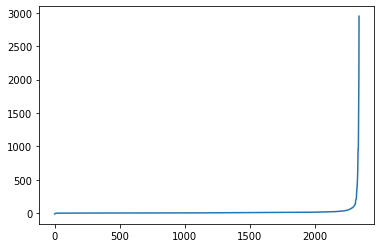

In [76]:
#plt.plot(vals_sorted)

C:\Users\ollie\AppData\Local\Temp\ipykernel_16512\2029291509.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bra.sort_values(by=['TIME'], inplace=True)


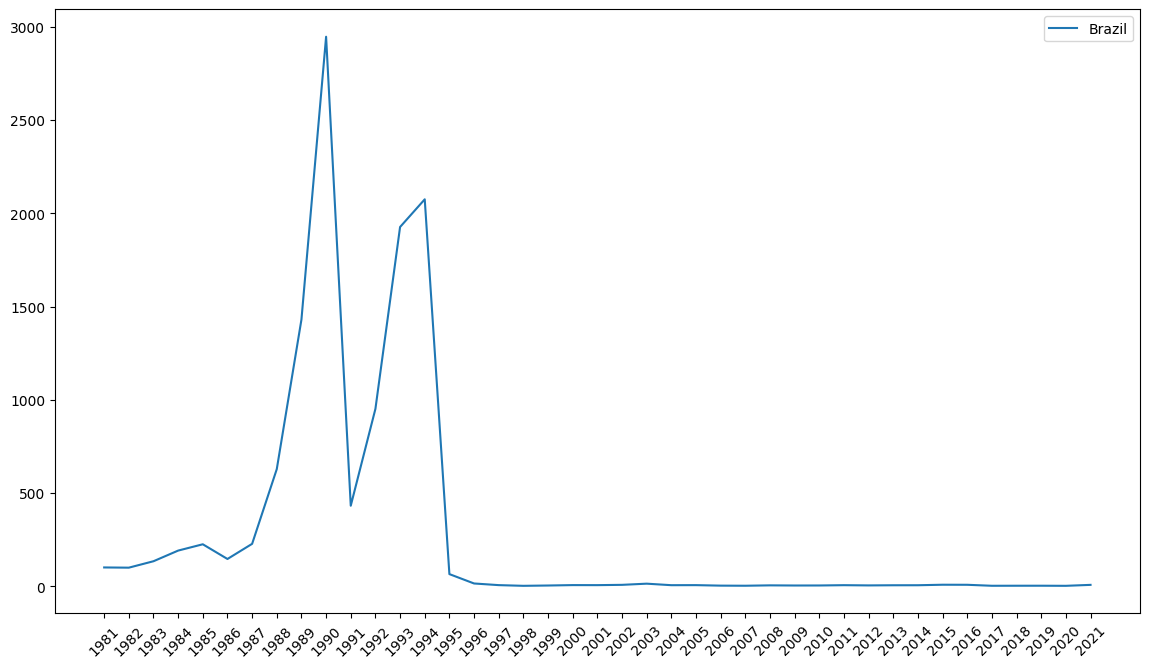

In [228]:
import datetime
plot_countries = ['Brazil']
plt.figure(figsize=(14, 8), dpi=100)
#x_ticks = pd.date_range(datetime.datetime(2010,1,1), datetime.datetime(2021,1,1), freq='YS')

bra = df.loc[df['COUNTRY'] == 'Brazil']
bra.sort_values(by=['TIME'], inplace=True)

#for country in plot_countries:
    #plt.plot(df.loc[df['COUNTRY'].eq(country)]['TIME'], df.loc[df['COUNTRY'].eq(country)]['VALUE'], label=country) 
#plt.xticks(np.linspace(0,150,num=13), labels=['2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'], rotation=90, fontsize=8)
plt.plot(bra['TIME'], bra['VALUE'], label='Brazil')
plt.xticks(rotation=45)
plt.legend()
plt.show()

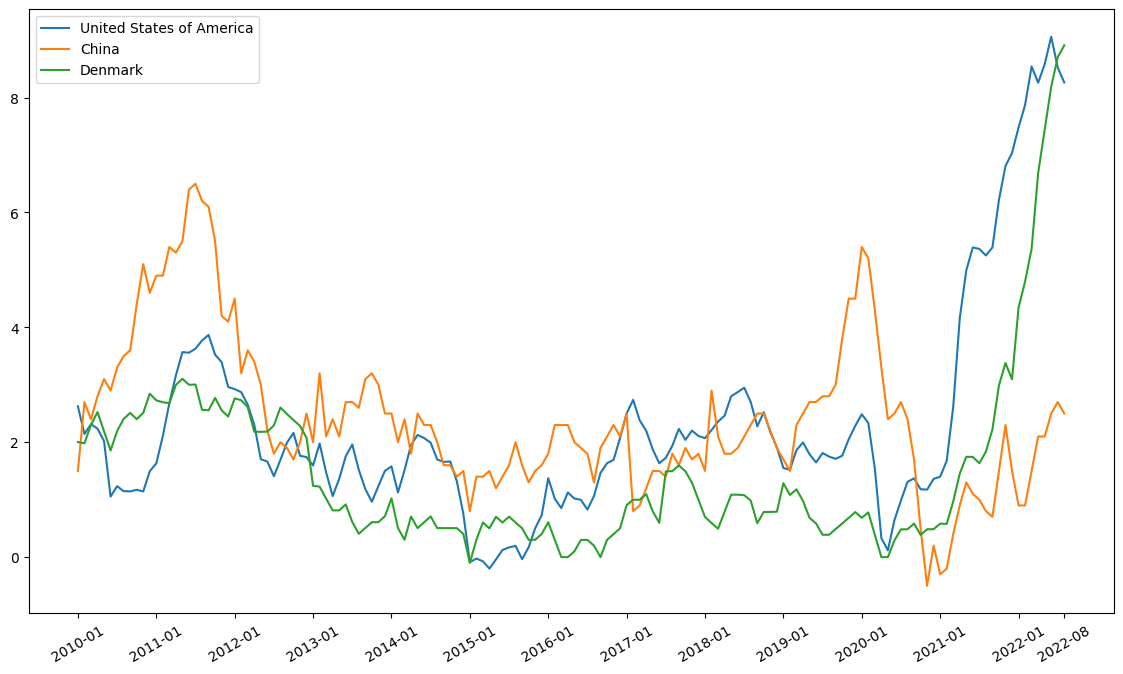

In [25]:
import datetime
plot_countries = ['United States of America', 'China', 'Denmark']
plt.figure(figsize=(14, 8), dpi=100)
#x_ticks = pd.date_range(datetime.datetime(2010,1,1), datetime.datetime(2021,1,1), freq='YS')

for country in plot_countries:
    plt.plot(df.loc[df['COUNTRY'].eq(country)]['TIME'], df.loc[df['COUNTRY'].eq(country)]['VALUE'], label=country) 
#plt.xticks(np.linspace(0,150,num=13), labels=['2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'], rotation=90, fontsize=8)
plt.xticks(['2010-01', '2011-01','2012-01', '2013-01','2014-01', '2015-01','2016-01', '2017-01','2018-01', '2019-01','2020-01', '2021-01','2022-01', '2022-08'], rotation=30)
plt.legend()
plt.show()


([<matplotlib.axis.XTick at 0x271ec9b87f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

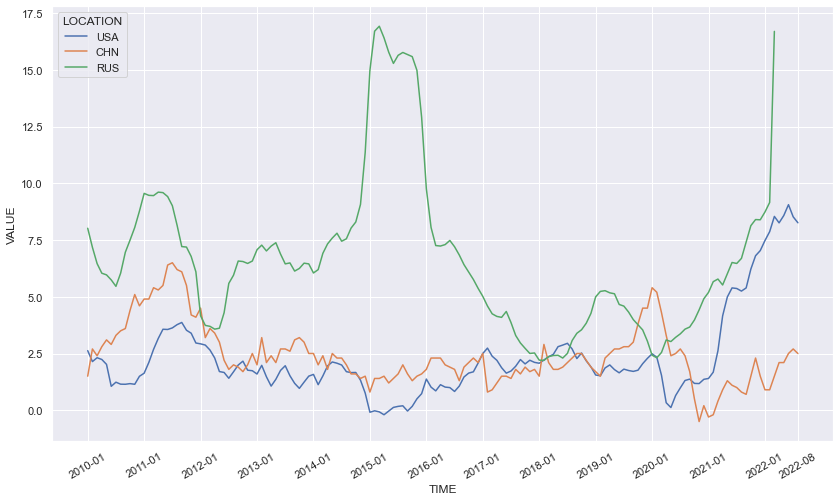

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

plot_countries = ['USA', 'CHN', 'RUS']
df_countries = df.loc[df['LOCATION'].isin(plot_countries)]

sns.lineplot(data=df_countries, x="TIME", y="VALUE", hue="LOCATION")
plt.xticks(['2010-01', '2011-01','2012-01', '2013-01','2014-01', '2015-01','2016-01', '2017-01','2018-01', '2019-01','2020-01', '2021-01','2022-01','2022-08'], rotation=30)